# **Dataset Vizualization**

In [134]:
import glob
import cv2
import matplotlib.pyplot as plt

In [135]:
actions = [action.split("\\")[1] for action in  glob.glob("UCF50/*")]
actions

['BaseballPitch',
 'Basketball',
 'BenchPress',
 'Biking',
 'Billiards',
 'BreastStroke',
 'CleanAndJerk',
 'Diving',
 'Drumming',
 'Fencing',
 'GolfSwing',
 'HighJump',
 'HorseRace',
 'HorseRiding',
 'HulaHoop',
 'JavelinThrow',
 'JugglingBalls',
 'JumpingJack',
 'JumpRope',
 'Kayaking',
 'Lunges',
 'MilitaryParade',
 'Mixing',
 'Nunchucks',
 'PizzaTossing',
 'PlayingGuitar',
 'PlayingPiano',
 'PlayingTabla',
 'PlayingViolin',
 'PoleVault',
 'PommelHorse',
 'PullUps',
 'Punch',
 'PushUps',
 'RockClimbingIndoor',
 'RopeClimbing',
 'Rowing',
 'SalsaSpin',
 'SkateBoarding',
 'Skiing',
 'Skijet',
 'SoccerJuggling',
 'Swing',
 'TaiChi',
 'TennisSwing',
 'ThrowDiscus',
 'TrampolineJumping',
 'VolleyballSpiking',
 'WalkingWithDog',
 'YoYo']

In [136]:
action = "TaiChi"

video_list = glob.glob(f"UCF50/{action}/*")
video_list

['UCF50/TaiChi\\v_TaiChi_g01_c01.avi',
 'UCF50/TaiChi\\v_TaiChi_g01_c02.avi',
 'UCF50/TaiChi\\v_TaiChi_g01_c03.avi',
 'UCF50/TaiChi\\v_TaiChi_g01_c04.avi',
 'UCF50/TaiChi\\v_TaiChi_g02_c01.avi',
 'UCF50/TaiChi\\v_TaiChi_g02_c02.avi',
 'UCF50/TaiChi\\v_TaiChi_g02_c03.avi',
 'UCF50/TaiChi\\v_TaiChi_g02_c04.avi',
 'UCF50/TaiChi\\v_TaiChi_g03_c01.avi',
 'UCF50/TaiChi\\v_TaiChi_g03_c02.avi',
 'UCF50/TaiChi\\v_TaiChi_g03_c03.avi',
 'UCF50/TaiChi\\v_TaiChi_g03_c04.avi',
 'UCF50/TaiChi\\v_TaiChi_g04_c01.avi',
 'UCF50/TaiChi\\v_TaiChi_g04_c02.avi',
 'UCF50/TaiChi\\v_TaiChi_g04_c03.avi',
 'UCF50/TaiChi\\v_TaiChi_g04_c04.avi',
 'UCF50/TaiChi\\v_TaiChi_g05_c01.avi',
 'UCF50/TaiChi\\v_TaiChi_g05_c02.avi',
 'UCF50/TaiChi\\v_TaiChi_g05_c03.avi',
 'UCF50/TaiChi\\v_TaiChi_g05_c04.avi',
 'UCF50/TaiChi\\v_TaiChi_g06_c01.avi',
 'UCF50/TaiChi\\v_TaiChi_g06_c02.avi',
 'UCF50/TaiChi\\v_TaiChi_g06_c03.avi',
 'UCF50/TaiChi\\v_TaiChi_g06_c04.avi',
 'UCF50/TaiChi\\v_TaiChi_g07_c01.avi',
 'UCF50/TaiChi\\v_TaiChi_

In [137]:
len(video_list)

100

In [138]:
index = 17

In [139]:
import time

def display_video(action, index):

    action = action

    video_list = glob.glob(f"UCF50/{action}/*")

    cap = cv2.VideoCapture(video_list[index])
    fps = 60

    while True:
        ret, video = cap.read()

        if not ret:
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            continue

        cv2.namedWindow('Video', cv2.WINDOW_NORMAL)
        cv2.resizeWindow('Video', 800, 600)
        
        cv2.imshow("Video",video)

        time.sleep(1 / fps)

        if cv2.waitKey(1) & 0xFF==ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows() 

In [140]:
# display_video(action, index)

<BarContainer object of 50 artists>

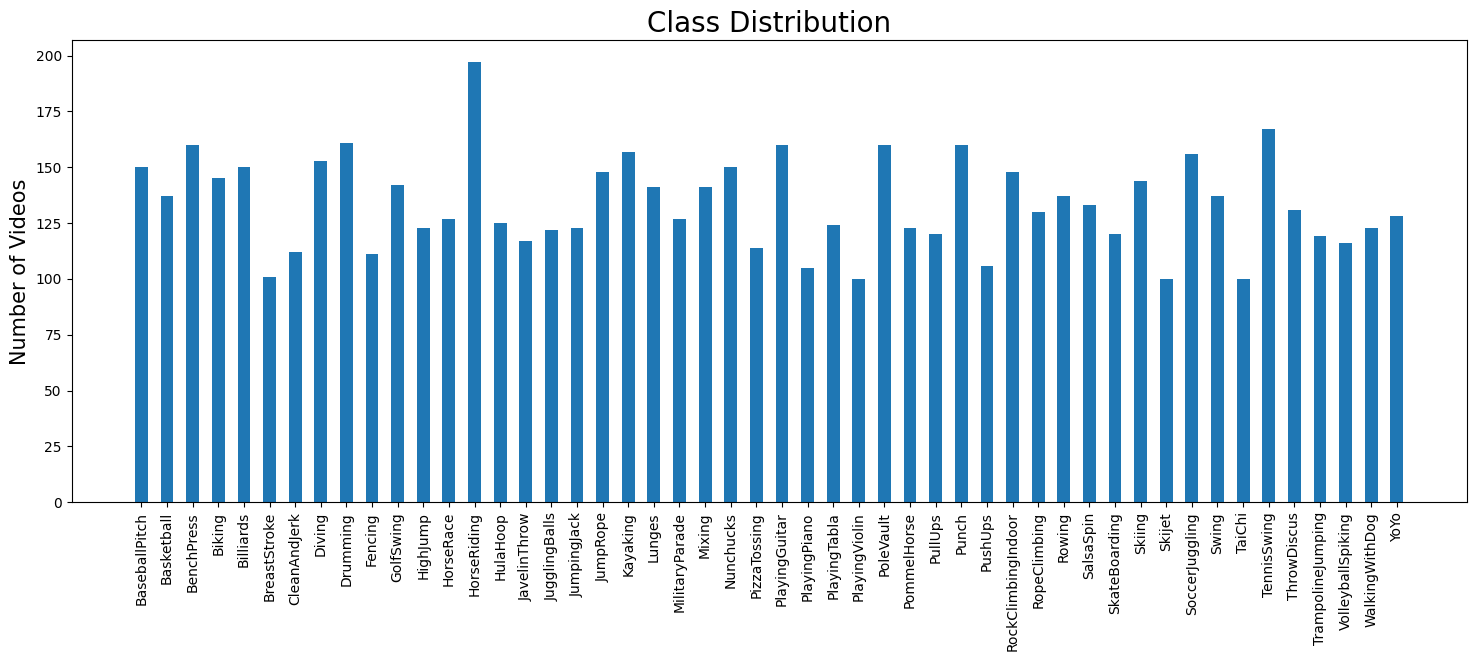

In [141]:
num_videos = [len(glob.glob(f"UCF50/{action}/*")) for action in actions]

plt.figure(figsize=(18,6))
plt.title("Class Distribution", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Number of Videos", fontsize=15)
plt.bar(actions,num_videos, width=0.5)

# **Extract Frames**

In [142]:
cap = cv2.VideoCapture(video_list[index])

print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

171.0


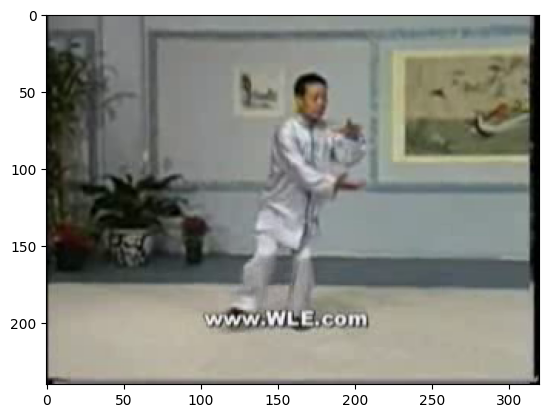

In [143]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 5)
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

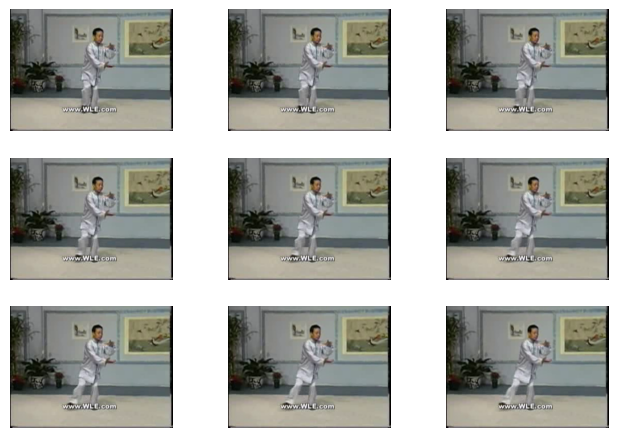

In [144]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.axis('off')
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)

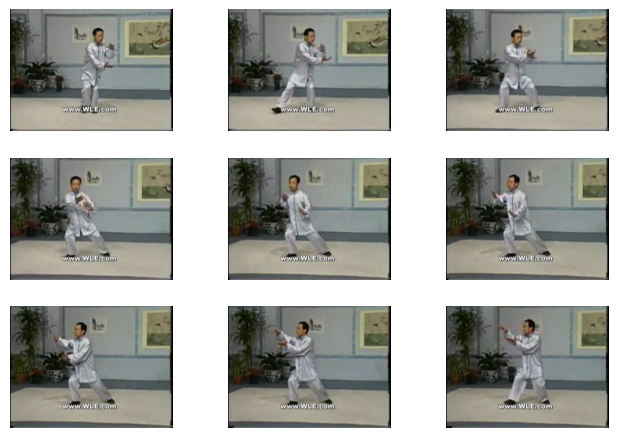

In [145]:
interval = max(cap.get(cv2.CAP_PROP_FRAME_COUNT)//9, 1)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.axis('off')
    cap.set(cv2.CAP_PROP_POS_FRAMES, i*interval)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)

In [146]:
from torchvision import transforms
import torch

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [147]:
def extract_frames(action, index, num_frames):

    video_list = glob.glob(f"UCF50/{action}/*")
    cap = cv2.VideoCapture(video_list[index])
    interval = max(cap.get(cv2.CAP_PROP_FRAME_COUNT)//num_frames, 1)
    frames_list = []

    for i in range(num_frames):
        
        cap.set(cv2.CAP_PROP_POS_FRAMES, i*interval)
        ret, frame = cap.read()

        if not ret:
            break

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = transform(frame)
        frames_list.append(frame)

    cap.release()

    return torch.stack(frames_list)

In [148]:
frames = extract_frames("PoleVault", 27, 15)
print(len(frames))
print(frames.shape)

15
torch.Size([15, 3, 64, 64])


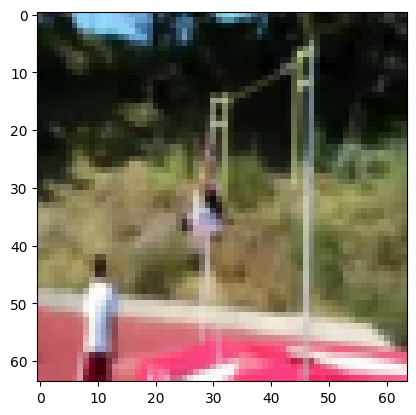

In [149]:
plt.imshow(frames[5].permute(1, 2, 0))

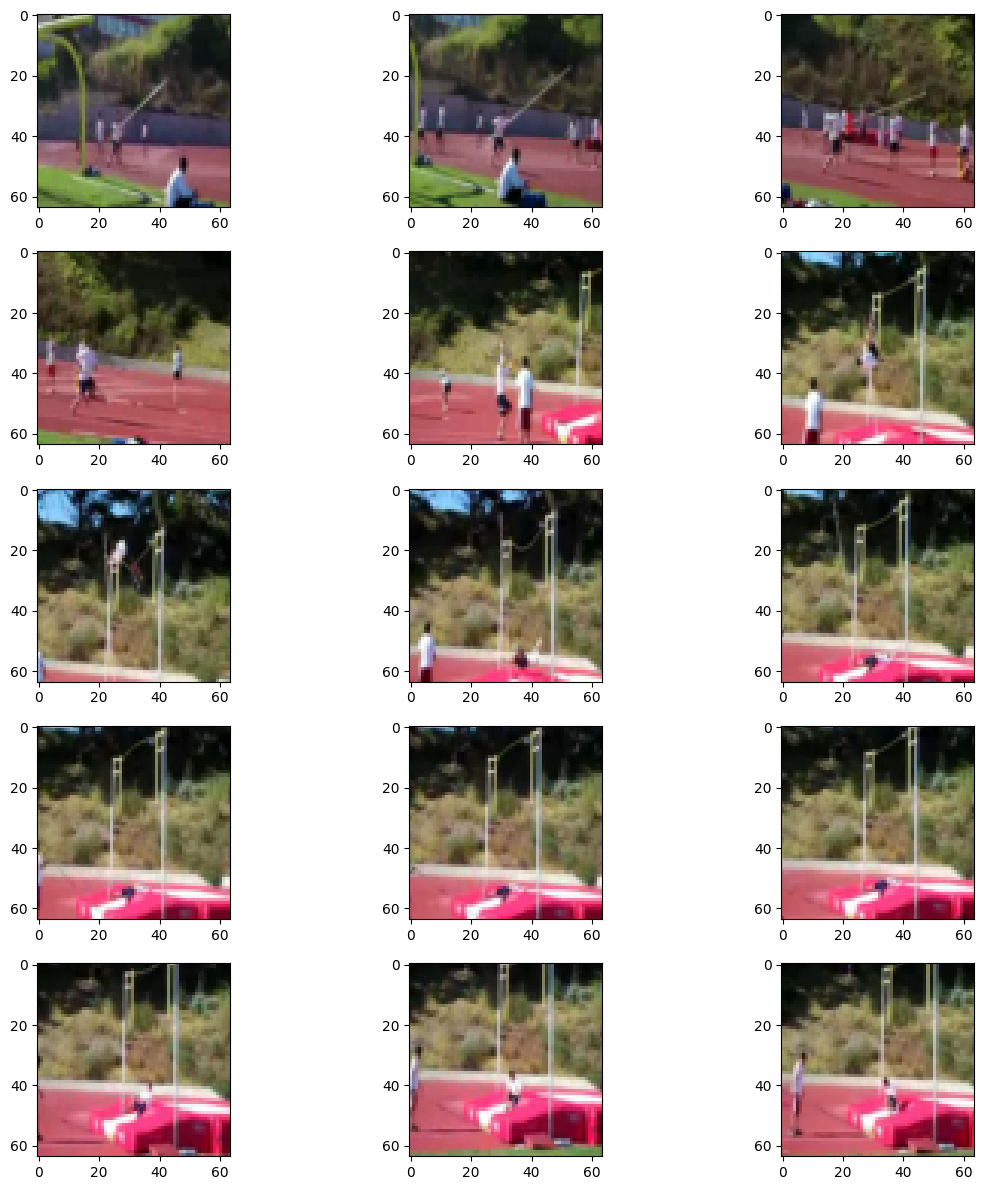

In [150]:
plt.figure(figsize=(12,12))

for i in range(len(frames)):
    plt.subplot(5,3,i+1)
    plt.tight_layout()
    plt.imshow(frames[i].permute(1, 2, 0))

# **Prepare dataset for training**

In [151]:
def prepare_dataset(num_frames):

    actions = [action.split("\\")[1] for action in  glob.glob("UCF50/*")]
    num_frames = num_frames

    features = []
    labels = []

    for act_idx, action in enumerate(actions):
        print(f"Extracting frames from {action} videos ...")
        action_dir = glob.glob(f"UCF50/{action}/*")
        for index in range(len(action_dir)):
            frames = extract_frames(action, index, num_frames)
            if len(frames) == num_frames:
                features.append(frames)
                labels.append(act_idx)

    print("Done.")

    return features, torch.tensor(labels, dtype=torch.long)

In [152]:
# dataset = prepare_dataset(num_frames=20)

In [153]:
import pickle

# pickle.dump(dataset, open("preprocessed_data.pkl", "wb"))
dataset = pickle.load(open("preprocessed_data.pkl", "rb"))

In [154]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import numpy as np

class VideoDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

In [155]:
def stratified_train_val_test_split(data, labels, train_size=0.7, batch_size=32):

    # Split data into train and val+test sets
    train_data, test_val_data, train_labels, test_val_labels = train_test_split(
        data, labels, train_size=train_size, stratify=labels, random_state=42
    )

    # Split val+test into val and test sets
    val_data, test_data, val_labels, test_labels = train_test_split(
        test_val_data, test_val_labels, test_size=0.5, stratify=test_val_labels, random_state=42
    )
    
    train_dataset = VideoDataset(train_data, train_labels)
    val_dataset = VideoDataset(val_data, val_labels)
    test_dataset = VideoDataset(test_data, test_labels)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

In [156]:
trainloader, validloader, testloader = stratified_train_val_test_split(*dataset, train_size=0.8)

In [157]:
print(len(trainloader))
print(len(validloader))
print(len(testloader))

167
21
21


In [158]:
for f,l in testloader:
    print(f.shape)
    print(l.shape)
    break

torch.Size([32, 20, 3, 64, 64])
torch.Size([32])


# **Checking GPU availability**

In [159]:
import torch

cuda_available = torch.cuda.is_available()

print("CUDA available:", cuda_available)

if cuda_available:
    print("Number of GPUs available:", torch.cuda.device_count())
    for i in range(torch.cuda.device_count()):
        print("GPU", i, ":", torch.cuda.get_device_name(i))
else:
    print("No GPUs available, CPU will be used.")

CUDA available: True
Number of GPUs available: 1
GPU 0 : NVIDIA GeForce RTX 3070 Ti Laptop GPU


In [160]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# **Some necessary functions**

In [161]:
import matplotlib.pyplot as plt

def plot_graphs(train_losses, valid_losses, train_accuracies, valid_accuracies):

    plt.subplot(211)
    plt.plot(range(1,len(train_losses)+1), train_losses, label="train_loss")
    plt.plot(range(1,len(valid_losses)+1), valid_losses, label="valid_loss")
    plt.legend()

    plt.subplot(212)
    plt.plot(range(1,len(train_accuracies)+1), train_accuracies, label="train_accuracy")
    plt.plot(range(1,len(valid_accuracies)+1), valid_accuracies, label="valid_accuracy")
    plt.legend()

In [162]:
def calculate_accuracy(model, dataloader):

    correct = 0
    total = 0

    model.eval()
    for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            with torch.no_grad():
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

    return correct / total

In [163]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [164]:
def train_model(model, num_epochs):

    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

    num_epochs = num_epochs
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    patience = 10
    best_val_loss = float("inf")
    epochs_no_improve = 0

    for epoch in range(num_epochs):
    
        model.train()
        train_loss = 0
        print(f"Epoch {epoch+1}")
        with tqdm(total = len(trainloader)) as pbar:
            for inputs, labels in trainloader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                train_loss += loss.item() * inputs.size(0)
                loss.backward()
                optimizer.step()
                pbar.update(1)

        model.eval()
        valid_loss = 0
        for inputs, labels in validloader:
            inputs, labels = inputs.to(device), labels.to(device)
            with torch.no_grad():
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item() * inputs.size(0)

        avg_train_loss = train_loss / len(trainloader.dataset)
        avg_valid_loss = valid_loss / len(validloader.dataset)
                
        train_losses.append(avg_train_loss)
        valid_losses.append(avg_valid_loss)

        train_accuracy = calculate_accuracy(model, trainloader)
        valid_accuracy = calculate_accuracy(model, validloader)

        train_accuracies.append(train_accuracy)
        valid_accuracies.append(valid_accuracy)
        
        print(f"Train Loss: {avg_train_loss}, Valid Loss: {avg_valid_loss}, Train Accuracy: {train_accuracy}, Valid Accuracy: {valid_accuracy}")

        if avg_valid_loss < best_val_loss:
            best_val_loss = avg_valid_loss
            epochs_no_improve = 0  # Reset counter
            torch.save(model.state_dict(), "model.pth")  # Save best model
            print("Model improved, saving checkpoint.\n")
        else:
            epochs_no_improve += 1
            print(f"No improvement for {epochs_no_improve} epochs.\n")

        # Trigger Early Stopping
        if epochs_no_improve >= patience:
            print("Early stopping triggered. Training halted.")
            break

    return train_losses, valid_losses, train_accuracies, valid_accuracies

# **Model Architecture**

In [165]:
import torchvision.models as models

class CNNLSTM(nn.Module):
    def __init__(self, num_classes, hidden_size=256, num_layers=1):
        super(CNNLSTM, self).__init__()

        # Pretrained CNN (ResNet18) for feature extraction
        resnet = models.resnet18(weights="ResNet18_Weights.DEFAULT")
        self.cnn = nn.Sequential(*list(resnet.children())[:-1])  # Remove final FC layer
        self.feature_dim = resnet.fc.in_features  # 512 features from ResNet18

        # LSTM for temporal modeling
        self.lstm = nn.LSTM(
            input_size=self.feature_dim,  # 512 features from CNN
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        batch_size, num_frames, C, H, W = x.shape  # (B, T, C, H, W)
        
        # Extract CNN features for each frame
        cnn_features = []
        for t in range(num_frames):
            frame = x[:, t, :, :, :]  # Extract frame (B, C, H, W)
            features = self.cnn(frame)  # CNN output (B, 512, 1, 1)
            features = features.view(batch_size, -1)  # Flatten to (B, 512)
            cnn_features.append(features)
        
        cnn_features = torch.stack(cnn_features, dim=1)  # (B, T, 512)

        # Pass through LSTM
        lstm_out, _ = self.lstm(cnn_features)  # (B, T, hidden_size)

        # Take the last LSTM output
        last_output = lstm_out[:, -1, :]  # (B, hidden_size)

        # Final classification
        out = self.fc(last_output)  # (B, num_classes)
        
        return out


# **Train model**

In [166]:
num_classes = 50
model = CNNLSTM(num_classes=num_classes, hidden_size=256, num_layers=1)
model.cuda()

CNNLSTM(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [35]:
train_losses, valid_losses, train_accuracies, valid_accuracies = train_model(model, 100)

Epoch 1


100%|██████████| 167/167 [00:44<00:00,  3.75it/s]


Train Loss: 3.810133018893396, Valid Loss: 3.66864458957832, Train Accuracy: 0.2688997005988024, Valid Accuracy: 0.22604790419161677
Model improved, saving checkpoint.

Epoch 2


100%|██████████| 167/167 [00:41<00:00,  4.04it/s]


Train Loss: 3.416848366845868, Valid Loss: 3.2049036739829058, Train Accuracy: 0.5014970059880239, Valid Accuracy: 0.41317365269461076
Model improved, saving checkpoint.

Epoch 3


100%|██████████| 167/167 [00:40<00:00,  4.11it/s]


Train Loss: 2.747658691006506, Valid Loss: 2.467993623482253, Train Accuracy: 0.6431511976047904, Valid Accuracy: 0.5269461077844312
Model improved, saving checkpoint.

Epoch 4


100%|██████████| 167/167 [00:41<00:00,  4.07it/s]


Train Loss: 1.9121784121690395, Valid Loss: 1.7507902869207417, Train Accuracy: 0.7707709580838323, Valid Accuracy: 0.6721556886227545
Model improved, saving checkpoint.

Epoch 5


100%|██████████| 167/167 [00:40<00:00,  4.09it/s]


Train Loss: 1.2161590567605938, Valid Loss: 1.2575894594192505, Train Accuracy: 0.9023203592814372, Valid Accuracy: 0.7574850299401198
Model improved, saving checkpoint.

Epoch 6


100%|██████████| 167/167 [00:40<00:00,  4.09it/s]


Train Loss: 0.7617325240266537, Valid Loss: 0.8839706710712638, Train Accuracy: 0.9492889221556886, Valid Accuracy: 0.8368263473053892
Model improved, saving checkpoint.

Epoch 7


100%|██████████| 167/167 [00:41<00:00,  3.99it/s]


Train Loss: 0.46760425150037527, Valid Loss: 0.6965212357972197, Train Accuracy: 0.9786676646706587, Valid Accuracy: 0.8652694610778443
Model improved, saving checkpoint.

Epoch 8


100%|██████████| 167/167 [00:40<00:00,  4.08it/s]


Train Loss: 0.29962026136007136, Valid Loss: 0.5507900263378006, Train Accuracy: 0.9923278443113772, Valid Accuracy: 0.8922155688622755
Model improved, saving checkpoint.

Epoch 9


100%|██████████| 167/167 [00:41<00:00,  4.06it/s]


Train Loss: 0.1980726047458049, Valid Loss: 0.4692889824955763, Train Accuracy: 0.9941991017964071, Valid Accuracy: 0.8997005988023952
Model improved, saving checkpoint.

Epoch 10


100%|██████████| 167/167 [00:41<00:00,  4.03it/s]


Train Loss: 0.1430926131988, Valid Loss: 0.4040496422502095, Train Accuracy: 0.999251497005988, Valid Accuracy: 0.9161676646706587
Model improved, saving checkpoint.

Epoch 11


100%|██████████| 167/167 [00:41<00:00,  3.99it/s]


Train Loss: 0.09955135989421142, Valid Loss: 0.36732495723370306, Train Accuracy: 0.999064371257485, Valid Accuracy: 0.9221556886227545
Model improved, saving checkpoint.

Epoch 12


100%|██████████| 167/167 [00:40<00:00,  4.09it/s]


Train Loss: 0.0781058396943315, Valid Loss: 0.33450717501297683, Train Accuracy: 0.999812874251497, Valid Accuracy: 0.9266467065868264
Model improved, saving checkpoint.

Epoch 13


100%|██████████| 167/167 [00:41<00:00,  4.06it/s]


Train Loss: 0.06315428072107053, Valid Loss: 0.3696307393605124, Train Accuracy: 0.999438622754491, Valid Accuracy: 0.9266467065868264
No improvement for 1 epochs.

Epoch 14


100%|██████████| 167/167 [00:40<00:00,  4.09it/s]


Train Loss: 0.048333001841685014, Valid Loss: 0.3288633351375957, Train Accuracy: 1.0, Valid Accuracy: 0.9176646706586826
Model improved, saving checkpoint.

Epoch 15


100%|██████████| 167/167 [00:41<00:00,  4.06it/s]


Train Loss: 0.04258645121788907, Valid Loss: 0.3201437433679661, Train Accuracy: 0.999625748502994, Valid Accuracy: 0.9221556886227545
Model improved, saving checkpoint.

Epoch 16


100%|██████████| 167/167 [00:41<00:00,  4.07it/s]


Train Loss: 0.03725090638516906, Valid Loss: 0.3071795542261558, Train Accuracy: 1.0, Valid Accuracy: 0.9161676646706587
Model improved, saving checkpoint.

Epoch 17


100%|██████████| 167/167 [00:41<00:00,  4.06it/s]


Train Loss: 0.03254243715326051, Valid Loss: 0.294900884885274, Train Accuracy: 1.0, Valid Accuracy: 0.9341317365269461
Model improved, saving checkpoint.

Epoch 18


100%|██████████| 167/167 [00:41<00:00,  4.06it/s]


Train Loss: 0.027889964020180846, Valid Loss: 0.2944389522789481, Train Accuracy: 0.999812874251497, Valid Accuracy: 0.9311377245508982
Model improved, saving checkpoint.

Epoch 19


100%|██████████| 167/167 [00:41<00:00,  4.04it/s]


Train Loss: 0.02507546576978025, Valid Loss: 0.2745682798816772, Train Accuracy: 1.0, Valid Accuracy: 0.9326347305389222
Model improved, saving checkpoint.

Epoch 20


100%|██████████| 167/167 [00:41<00:00,  4.06it/s]


Train Loss: 0.02475131164767785, Valid Loss: 0.27007025163509174, Train Accuracy: 1.0, Valid Accuracy: 0.938622754491018
Model improved, saving checkpoint.

Epoch 21


100%|██████████| 167/167 [00:41<00:00,  4.03it/s]


Train Loss: 0.01974562552763138, Valid Loss: 0.24449807499161738, Train Accuracy: 1.0, Valid Accuracy: 0.9356287425149701
Model improved, saving checkpoint.

Epoch 22


100%|██████████| 167/167 [00:40<00:00,  4.09it/s]


Train Loss: 0.019018128681593312, Valid Loss: 0.2619337248141894, Train Accuracy: 1.0, Valid Accuracy: 0.9341317365269461
No improvement for 1 epochs.

Epoch 23


100%|██████████| 167/167 [00:41<00:00,  4.02it/s]


Train Loss: 0.016836175081615678, Valid Loss: 0.2565630256772755, Train Accuracy: 1.0, Valid Accuracy: 0.9356287425149701
No improvement for 2 epochs.

Epoch 24


100%|██████████| 167/167 [00:41<00:00,  4.07it/s]


Train Loss: 0.016873071131904324, Valid Loss: 0.26671243784670345, Train Accuracy: 1.0, Valid Accuracy: 0.9326347305389222
No improvement for 3 epochs.

Epoch 25


100%|██████████| 167/167 [00:41<00:00,  4.05it/s]


Train Loss: 0.01589533851152944, Valid Loss: 0.2457335861678609, Train Accuracy: 1.0, Valid Accuracy: 0.9461077844311377
No improvement for 4 epochs.

Epoch 26


100%|██████████| 167/167 [00:41<00:00,  4.05it/s]


Train Loss: 0.014227621221056063, Valid Loss: 0.2322485247950354, Train Accuracy: 1.0, Valid Accuracy: 0.9446107784431138
Model improved, saving checkpoint.

Epoch 27


100%|██████████| 167/167 [00:41<00:00,  4.06it/s]


Train Loss: 0.013187064744621337, Valid Loss: 0.2757467686416146, Train Accuracy: 1.0, Valid Accuracy: 0.9266467065868264
No improvement for 1 epochs.

Epoch 28


100%|██████████| 167/167 [00:41<00:00,  4.04it/s]


Train Loss: 0.01259673552442632, Valid Loss: 0.25692958023376805, Train Accuracy: 1.0, Valid Accuracy: 0.938622754491018
No improvement for 2 epochs.

Epoch 29


100%|██████████| 167/167 [00:41<00:00,  4.04it/s]


Train Loss: 0.011279413448702433, Valid Loss: 0.24634832427084088, Train Accuracy: 1.0, Valid Accuracy: 0.937125748502994
No improvement for 3 epochs.

Epoch 30


100%|██████████| 167/167 [00:41<00:00,  4.02it/s]


Train Loss: 0.010919214867635401, Valid Loss: 0.29934176481412555, Train Accuracy: 1.0, Valid Accuracy: 0.9206586826347305
No improvement for 4 epochs.

Epoch 31


100%|██████████| 167/167 [00:41<00:00,  4.06it/s]


Train Loss: 0.010558031198239611, Valid Loss: 0.24555906481639353, Train Accuracy: 1.0, Valid Accuracy: 0.9416167664670658
No improvement for 5 epochs.

Epoch 32


100%|██████████| 167/167 [00:41<00:00,  4.05it/s]


Train Loss: 0.010365144865486972, Valid Loss: 0.26108458548962715, Train Accuracy: 1.0, Valid Accuracy: 0.937125748502994
No improvement for 6 epochs.

Epoch 33


100%|██████████| 167/167 [00:41<00:00,  4.06it/s]


Train Loss: 0.00926928610323432, Valid Loss: 0.24129677398832972, Train Accuracy: 1.0, Valid Accuracy: 0.9401197604790419
No improvement for 7 epochs.

Epoch 34


100%|██████████| 167/167 [00:41<00:00,  4.06it/s]


Train Loss: 0.009303001926732278, Valid Loss: 0.24438131386469938, Train Accuracy: 1.0, Valid Accuracy: 0.9341317365269461
No improvement for 8 epochs.

Epoch 35


100%|██████████| 167/167 [00:41<00:00,  4.00it/s]


Train Loss: 0.008614662973332904, Valid Loss: 0.24996361493350502, Train Accuracy: 1.0, Valid Accuracy: 0.9311377245508982
No improvement for 9 epochs.

Epoch 36


100%|██████████| 167/167 [00:41<00:00,  4.03it/s]


Train Loss: 0.008608866549894482, Valid Loss: 0.24278321795299382, Train Accuracy: 1.0, Valid Accuracy: 0.9416167664670658
No improvement for 10 epochs.

Early stopping triggered. Training halted.


# **Evaluate model**

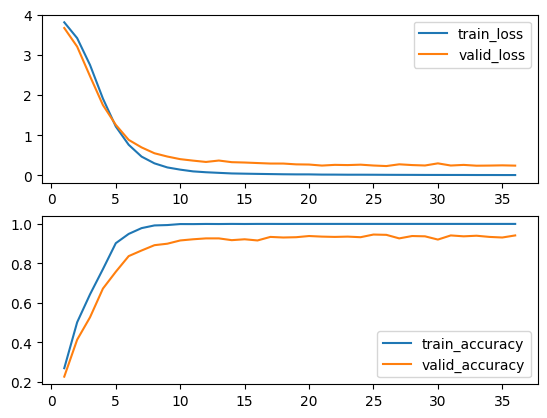

In [36]:
plot_graphs(train_losses, valid_losses, train_accuracies, valid_accuracies)

In [167]:
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

In [38]:
print(f"Train Accuracy: {calculate_accuracy(model, trainloader)}")
print(f"Valid Accuracy: {calculate_accuracy(model, validloader)}")
print(f"Test Accuracy: {calculate_accuracy(model, testloader)}")

Train Accuracy: 1.0
Valid Accuracy: 0.9446107784431138
Test Accuracy: 0.929745889387145


In [168]:
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.append(labels)
        y_pred.append(predicted)

In [169]:
actions = [action.split("\\")[1] for action in  glob.glob("UCF50/*")]

In [170]:
from sklearn.metrics import classification_report

y_true = torch.cat(y_true).cpu().numpy()
y_pred = torch.cat(y_pred).cpu().numpy()

print(classification_report(y_true, y_pred, target_names=actions))

                    precision    recall  f1-score   support

     BaseballPitch       1.00      1.00      1.00        15
        Basketball       1.00      0.86      0.92        14
        BenchPress       1.00      1.00      1.00        16
            Biking       0.78      0.93      0.85        15
         Billiards       1.00      1.00      1.00        15
      BreastStroke       1.00      1.00      1.00        10
      CleanAndJerk       1.00      1.00      1.00        11
            Diving       1.00      0.94      0.97        16
          Drumming       0.93      0.88      0.90        16
           Fencing       1.00      1.00      1.00        11
         GolfSwing       0.92      0.86      0.89        14
          HighJump       0.80      1.00      0.89        12
         HorseRace       1.00      1.00      1.00        13
       HorseRiding       0.90      0.95      0.93        20
          HulaHoop       1.00      0.92      0.96        12
      JavelinThrow       1.00      0.82

# **Sample Prediction**

In [1]:
import glob
import cv2
import time
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models

In [2]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [3]:
def extract_frames(path):

    cap = cv2.VideoCapture(path)
    interval = max(cap.get(cv2.CAP_PROP_FRAME_COUNT)//20, 1)
    frames_list = []

    for i in range(20):
        
        cap.set(cv2.CAP_PROP_POS_FRAMES, i*interval)
        ret, frame = cap.read()

        if not ret:
            break

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = transform(frame)
        frames_list.append(frame)

    cap.release()

    return torch.stack(frames_list)

In [4]:
def display_prediction(path, predicted):

    cap = cv2.VideoCapture(path)
    fps = 60

    while True:
        ret, video = cap.read()

        if not ret:
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            continue

        cv2.namedWindow('Video', cv2.WINDOW_NORMAL)
        cv2.resizeWindow('Video', 800, 600)
        
        video = cv2.putText(video, predicted, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

        cv2.imshow("Video",video)

        time.sleep(1 / fps)

        if cv2.waitKey(1) & 0xFF==ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [5]:
class CNNLSTM(nn.Module):
    def __init__(self, num_classes, hidden_size=256, num_layers=1):
        super(CNNLSTM, self).__init__()

        # Pretrained CNN (ResNet18) for feature extraction
        resnet = models.resnet18(weights="ResNet18_Weights.DEFAULT")
        self.cnn = nn.Sequential(*list(resnet.children())[:-1])  # Remove final FC layer
        self.feature_dim = resnet.fc.in_features  # 512 features from ResNet18

        # LSTM for temporal modeling
        self.lstm = nn.LSTM(
            input_size=self.feature_dim,  # 512 features from CNN
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        batch_size, num_frames, C, H, W = x.shape  # (B, T, C, H, W)
        
        # Extract CNN features for each frame
        cnn_features = []
        for t in range(num_frames):
            frame = x[:, t, :, :, :]  # Extract frame (B, C, H, W)
            features = self.cnn(frame)  # CNN output (B, 512, 1, 1)
            features = features.view(batch_size, -1)  # Flatten to (B, 512)
            cnn_features.append(features)
        
        cnn_features = torch.stack(cnn_features, dim=1)  # (B, T, 512)

        # Pass through LSTM
        lstm_out, _ = self.lstm(cnn_features)  # (B, T, hidden_size)

        # Take the last LSTM output
        last_output = lstm_out[:, -1, :]  # (B, hidden_size)

        # Final classification
        out = self.fc(last_output)  # (B, num_classes)
        
        return out

In [6]:
model = CNNLSTM(num_classes=50)
model.cuda()

CNNLSTM(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [8]:
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

In [9]:
labels = [action.split("\\")[1] for action in  glob.glob("UCF50/*")]

## Sample prediction on videos from the dataset

In [30]:
path = glob.glob("UCF50/Skiing/*")[78]
path

'UCF50/Skiing\\v_Skiing_g13_c07.avi'

In [31]:
frames = extract_frames(path).unsqueeze(0)
frames.shape

torch.Size([1, 20, 3, 64, 64])

In [32]:
input = frames.to(device)

model.eval()
with torch.no_grad():
    predicted = labels[torch.argmax(torch.softmax(model(input), dim=1)).item()]

display_prediction(path, predicted)

## Sample prediction on videos outside the dataset

In [27]:
path = "test/7658503-sd_960_506_25fps.mp4"

In [28]:
frames = extract_frames(path).unsqueeze(0)
frames.shape

torch.Size([1, 20, 3, 64, 64])

In [29]:
input = frames.to(device)

model.eval()
with torch.no_grad():
    predicted = labels[torch.argmax(torch.softmax(model(input), dim=1)).item()]

display_prediction(path, predicted)

# **Autotagging**

In [32]:
from autotagging import Tags

tags = Tags.activity_tags[predicted]

for tag in tags:
    print("#"+tag)

#equestrian
#outdoor
#balance
#motion
